# **IMPORT LIBS**

In [1]:
import pandas as pd
import sys
from collections import Counter
from tqdm import tqdm

recommenders_path = 'Recommenders'
sys.path.append(recommenders_path)

graphs_path = 'Graphs'
sys.path.append(graphs_path)

artist_path = 'Artists'
sys.path.append(artist_path)

graphics_path = 'Graphics'
sys.path.append(graphics_path)

from Recommenders.PopularityRecommender import PopularityRecommender
from Recommenders.StrongerConnectionsRecommender import StrongerConnectionsRecommender
from Graphs.BipartiteGraph import BipartiteGraph
from Graphics.Graphics import Graphics

# **Loading the data**

In [2]:
df = pd.read_csv('../data/spotify_artists.csv')
df

,external_urls,followers,genres,id,name,popularity,uri,related_artists_ids
0,https://open.spotify.com/artist/4dpARuHxo51G3z...,57657211,"british soul, pop, pop soul, uk pop",4dpARuHxo51G3z768sgnrY,Adele,86,spotify:artist:4dpARuHxo51G3z768sgnrY,"5WUlDfRSoLAfcVSX1WnrxN, 2wY79sveU1sp5g7SokKOiI..."
1,https://open.spotify.com/artist/66CXWjxzNUsdJx...,98814719,pop,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,91,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR,"4nDoRrQiYLoBzwC5BhVJzF, 0C8ZW7ezQVs4URX5aX7Kqx..."
2,https://open.spotify.com/artist/13ubrt8QOOCPlj...,14722549,"east coast hip hop, hip hop, rap",13ubrt8QOOCPljQ2FL1Kca,A$AP Rocky,84,spotify:artist:13ubrt8QOOCPljQ2FL1Kca,"5dHt1vcEm9qb8fCyLcB3HL, 2P5sC9cVZDToPxyomzF1UH..."
3,https://open.spotify.com/artist/06HL4z0CvFAxyc...,118971229,pop,06HL4z0CvFAxyc27GXpf02,Taylor Swift,100,spotify:artist:06HL4z0CvFAxyc27GXpf02,"0C8ZW7ezQVs4URX5aX7Kqx, 1McMsnEElThX1knmY4oliG..."
4,https://open.spotify.com/artist/7Ln80lUS6He07X...,25991892,"garage rock, modern rock, permanent wave, rock...",7Ln80lUS6He07XvHI8qqHH,Arctic Monkeys,85,spotify:artist:7Ln80lUS6He07XvHI8qqHH,"77SW9BnxLY8rJ0RciFqkHh, 0epOFNiUfyON9EYx7Tpr6V..."
...,...,...,...,...,...,...,...,...
14783,https://open.spotify.com/artist/7EyzyrMNgqiK8b...,1417807,rap mineiro,7EyzyrMNgqiK8bMrbkOT9l,Sidoka,59,spotify:artist:7EyzyrMNgqiK8bMrbkOT9l,"4oPnjkJcLqOim9KJxvIYMz, 1QBWA6tuiZ0JuDluPqbe71..."
14784,https://open.spotify.com/artist/6gzXCdfYfFe5XK...,2313438,"k-pop, k-pop boy group",6gzXCdfYfFe5XKhPKkYqxV,SUPER JUNIOR,58,spotify:artist:6gzXCdfYfFe5XKhPKkYqxV,"6nVMMEywS5Y4tsHPKx1nIo, 1bkpTEmumLC3xc7HgMsttU..."
14785,https://open.spotify.com/artist/7AAXcP4NpvvLM9...,609413,"sertanejo, sertanejo universitario",7AAXcP4NpvvLM9Xcfy64ij,Hugo Pena & Gabriel,40,spotify:artist:7AAXcP4NpvvLM9Xcfy64ij,"5Dyg6H3QJHQV5c7ojyKWyv, 4ZUahcHoVxr4lsrfdmhjhV..."
14786,https://open.spotify.com/artist/5KvkOKroKLz202...,186296,"folk metal, german metal, melodic death metal,...",5KvkOKroKLz202ioXfGWR2,Equilibrium,49,spotify:artist:5KvkOKroKLz202ioXfGWR2,3t5X2CVDf5mrlIx1SdvWYM


# **Creating the complex network**

In [3]:
edges = []
for i in range(len(df)):
    genres_artist = df['genres'][i].split(', ')
    for g in genres_artist:
        edge = (df['id'][i], g, df['popularity'][i])
        edges.append(edge)

In [4]:
artists_nodes = [(df['id'][index], dict(popularity=int(df['popularity'][index]), name=str(df['name'][index]))) for index in range(len(df['id']))]
genres_nodes = set([item.strip() for sublist in df['genres'].dropna().apply(lambda x: x.split(',')) for item in sublist])

## **Bipartite network (genres and artists)**

In [5]:
Bipartite_G = BipartiteGraph()
Bipartite_G.add_nodes(artists_nodes, genres_nodes)
Bipartite_G.add_edges(edges)
name_network = 'popularity_recommender'

## **Simple network (only artists)**

In [6]:
G = Bipartite_G.transform_bipartite_into_simple(list(df['id']))

# **Analyzing the network**

## **Basic information**

In [7]:
print(f'Number of nodes: {G.get_number_of_nodes()}')
print(f'Number of edges: {G.get_number_of_edges()}')
print(f'Number of components: {G.get_number_connected_components()}')
print(f'Smallest degree in the network: {G.get_minimum_degree()}')
print(f'Largest degree in the network: {G.get_maximum_degree()}')
print(f'Average degree of the network: {G.get_average_degree()}')
print(f'Network density: {G.get_density()}')
#print(f'Average distance: {G.average_shortest_path_length()}')
#average_clustering_coefficient, percentage_of_considered_nodes = G.get_average_clustering_coefficient()
#print(f'Average clustering coefficient: {average_clustering_coefficient} (only {percentage_of_considered_nodes:.2%} of the network was considered in the calculation, which have a degree greater than one)')

Number of nodes: 14788
Number of edges: 774610
Number of components: 118
Smallest degree in the network: 1
Largest degree in the network: 768
Average degree of the network: 104.76196916418718
Network density: 0.0070847345076206925


## **Degree distribution**

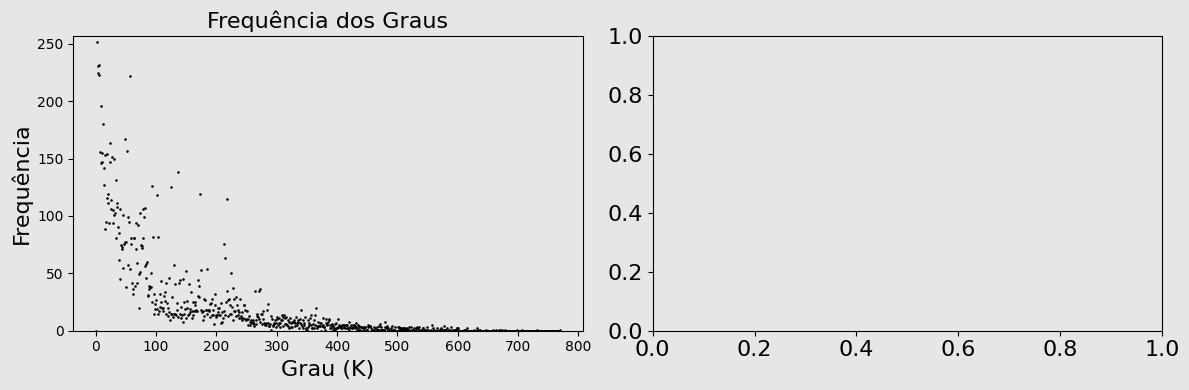

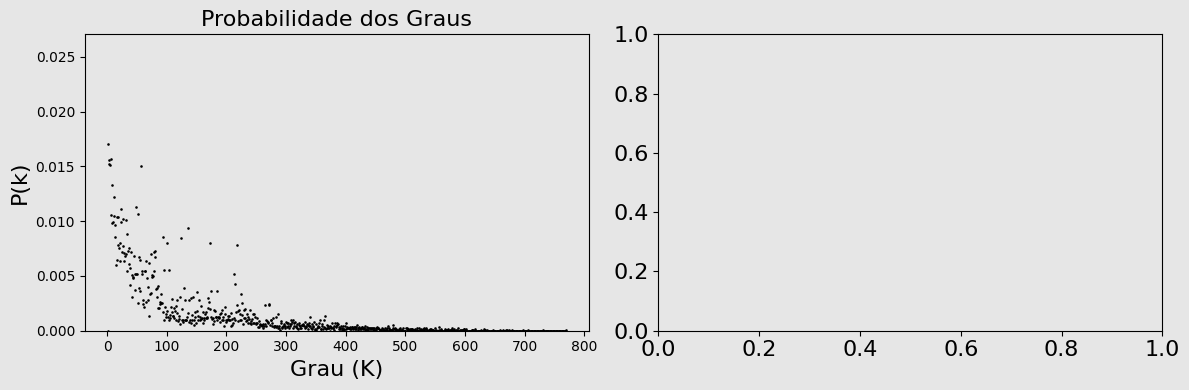

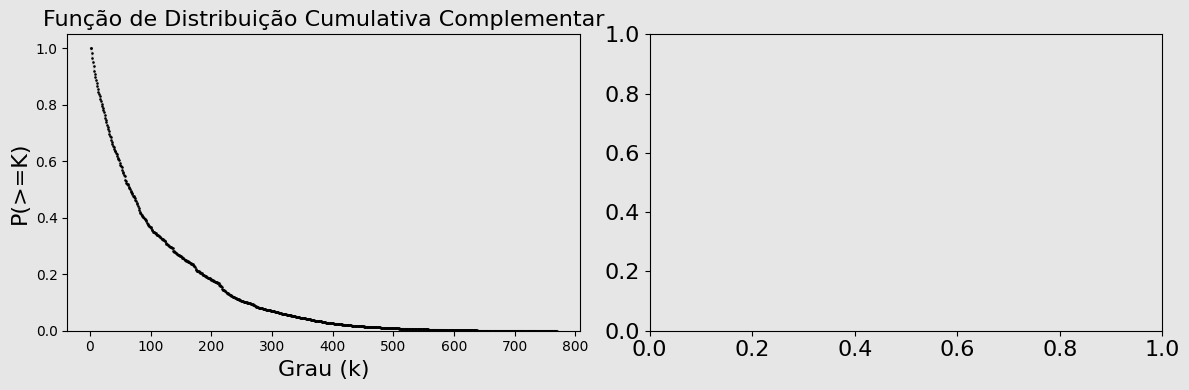

In [8]:
frequencies_of_degrees, probability_of_degrees, accumulated_probability_of_degress = G.get_degree_distribution()
Graphics.create_graphic_degrees(data = frequencies_of_degrees, xLabel = 'Grau (K)', yLabel = 'Frequência', title = 'Frequência dos Graus', limit = 5, lines = False, name_network = name_network)
Graphics.create_graphic_degrees(data = probability_of_degrees, xLabel = 'Grau (K)', yLabel = 'P(k)', title = 'Probabilidade dos Graus', limit = 0.01, lines = False,  name_network = name_network)
Graphics.create_graphic_degrees(data = accumulated_probability_of_degress, xLabel = 'Grau (k)', yLabel = 'P(>=K)', title = 'Função de Distribuição Cumulativa Complementar', limit = 0.05, lines = True,  name_network = name_network)

### **Centralidades**

#### **Centralidade por Grau**

In [9]:
#degree_centrality=G.get_degree_centrality()
#analysis_centrality=Graphics.create_graphic_centrality(data=degree_centrality, title='Centralidade por Grau', name_network=name_network)
#Graphics.create_ranking_centrality(centrality=degree_centrality, graph=G, title='Centralidade por Grau - Ranking', name_network=name_network)

In [10]:
#eigenvector_centrality=G.get_eigenvector_centrality()
#analysis_centrality=Graphics.create_graphic_centrality(data=eigenvector_centrality, title='Centralidade por Autovetor', name_network=name_network)
#Graphics.create_ranking_centrality(centrality=eigenvector_centrality, graph=G, title='Centralidade por Autovetor - Ranking', name_network=name_network)

### **Comunidades**

In [11]:
#louvain_communities = G.get_louvain_communities()

In [12]:
#for index, community in enumerate(louvain_communities):
#    print(f'Comunidade {index+1:2}:', end=' ')
#    community_list = []
#    for artist_id in community:
#        community_list.append(G.graph.nodes[artist_id]['name'])
#    print(community_list)
#    if len(community_list) == 1: print(G.get_degree(artist_id))

## **Recomendador**

In [13]:
analysis = {}
counter_nan=0

for index in tqdm(range(len(df))):

    if type(df['related_artists_ids'][index]) == float: 
        counter_nan+=1
        continue

    related_artists_ids = df['related_artists_ids'][index].split(', ')
    number_recommendations = len(related_artists_ids)

    recommender = PopularityRecommender(Bipartite_G, number_recommendations)
    recommended_artists = recommender.make_recommendations(df['id'][index])

    counter=0
    for artist_id in recommended_artists:
        if artist_id in related_artists_ids:
            counter+=1
    analysis[df['id'][index]] =  counter/len(recommended_artists)

100%|██████████| 14788/14788 [00:05<00:00, 2780.79it/s]


In [28]:
total_correct_mean = sum(analysis.values())/len(analysis.values())
print(f'On average, {total_correct_mean:.2%} is equal to the recommendations made by Spotify')
print(f'{counter_nan} artists (out of {len(df)}) had no related artists, either because the API did not provide any or because they were removed')

On average, 76.37% is equal to the recommendations made by Spotify
0 artists (out of 14788) had no related artists, either because the API did not provide any or because they were removed


In [19]:
analysis = {}
counter_nan=0
for index in tqdm(range(len(df))):

    recommender_stronger = StrongerConnectionsRecommender(G, 20)
    recommended_artists_stronger = recommender_stronger.make_recommendations(df['id'][index], collaborations=False)

    number_recommendations = len(recommended_artists_stronger)

    recommender = PopularityRecommender(Bipartite_G, number_recommendations)
    recommended_artists = recommender.make_recommendations(df['id'][index])

    counter=0
    for artist_id in recommended_artists:
        if artist_id in recommended_artists_stronger:
            counter+=1
            
    analysis[df['id'][index]] =  counter/len(recommended_artists) 

100%|██████████| 14788/14788 [00:08<00:00, 1739.12it/s]


In [29]:
total_correct_mean = sum(analysis.values())/len(analysis.values())
print(f'On average, {total_correct_mean:.2%} is equal to the recommendations made by Spotify')
print(f'{counter_nan} artists (out of {len(df)}) had no related artists, either because the API did not provide any or because they were removed')

On average, 76.37% is equal to the recommendations made by Spotify
0 artists (out of 14788) had no related artists, either because the API did not provide any or because they were removed


In [21]:
analysis = {}
counter_nan=0
for index in tqdm(range(len(df))):

    recommender = PopularityRecommender(Bipartite_G, 20)
    recommended_artists = recommender.make_recommendations(df['id'][index])

    number_recommendations = len(recommended_artists)

    recommender_stronger = StrongerConnectionsRecommender(G, number_recommendations)
    recommended_artists_stronger = recommender_stronger.make_recommendations(df['id'][index], collaborations=False)

    counter=0
    for artist_id in recommended_artists_stronger:
        if artist_id in recommended_artists:
            counter+=1
            
    analysis[df['id'][index]] =  counter/len(recommended_artists_stronger) 

100%|██████████| 14788/14788 [00:09<00:00, 1640.49it/s]


In [22]:
total_correct_mean = sum(analysis.values())/len(analysis.values())
print(total_correct_mean)

0.7637104408980256


In [23]:
artists_ids = {}
for i in range(len(df)):
    artists_ids[df['id'][i]] = df['name'][i]



In [24]:
recommender = PopularityRecommender(Bipartite_G, 20)
recommended_artists = recommender.make_recommendations(df['id'][0])
recommender.convert_recommendations(df['id'][0], artists_ids)

recommended artists based on Adele:


TypeError: 'NoneType' object is not iterable